In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [350]:
dataframe = pd.read_csv('Data/dataset.csv')
dataframe.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1073,1.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,153.0,93.0,29.34,103.0,88.0,0.0
1,953,0.0,39.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,170.0,137.5,77.5,27.35,67.0,70.0,0.0
2,2584,0.0,43.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,256.0,129.0,86.0,25.89,96.0,72.0,0.0
3,3068,0.0,46.0,3.0,1.0,30.0,0.0,0.0,0.0,0.0,196.0,114.0,75.0,21.01,60.0,69.0,0.0
4,1826,0.0,38.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,102.5,60.0,22.58,60.0,57.0,0.0


In [351]:
dataframe.drop('education', axis=1, inplace=True)

In [352]:
dataframe.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [353]:
dataframe.head()

,Unnamed: 0,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1073,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,153.0,93.0,29.34,103.0,88.0,0.0
1,953,0.0,39.0,1.0,5.0,0.0,0.0,0.0,0.0,170.0,137.5,77.5,27.35,67.0,70.0,0.0
2,2584,0.0,43.0,1.0,1.0,0.0,0.0,0.0,0.0,256.0,129.0,86.0,25.89,96.0,72.0,0.0
3,3068,0.0,46.0,1.0,30.0,0.0,0.0,0.0,0.0,196.0,114.0,75.0,21.01,60.0,69.0,0.0
4,1826,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,102.5,60.0,22.58,60.0,57.0,0.0


In [354]:
x = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

<Axes: xlabel='male', ylabel='count'>

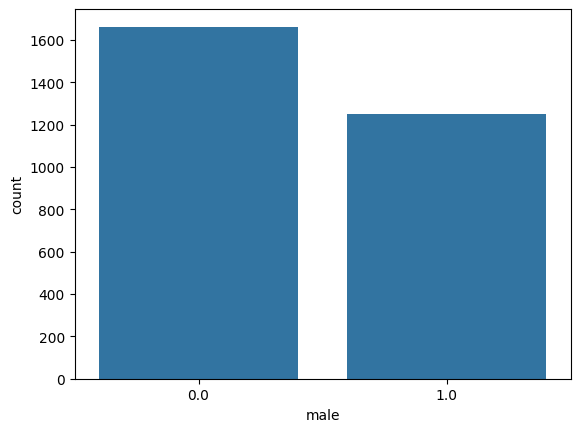

In [355]:
sns.countplot(x=train_data['male']) ##plotting a count plot of male

<Axes: xlabel='male', ylabel='count'>

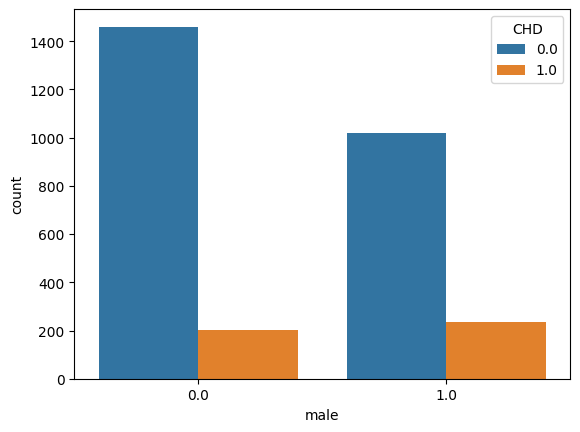

In [356]:
sns.countplot(x=train_data['male'], hue=train_data['CHD']) ##plotting a count plot of CHD and male having disease or not 

<Axes: >

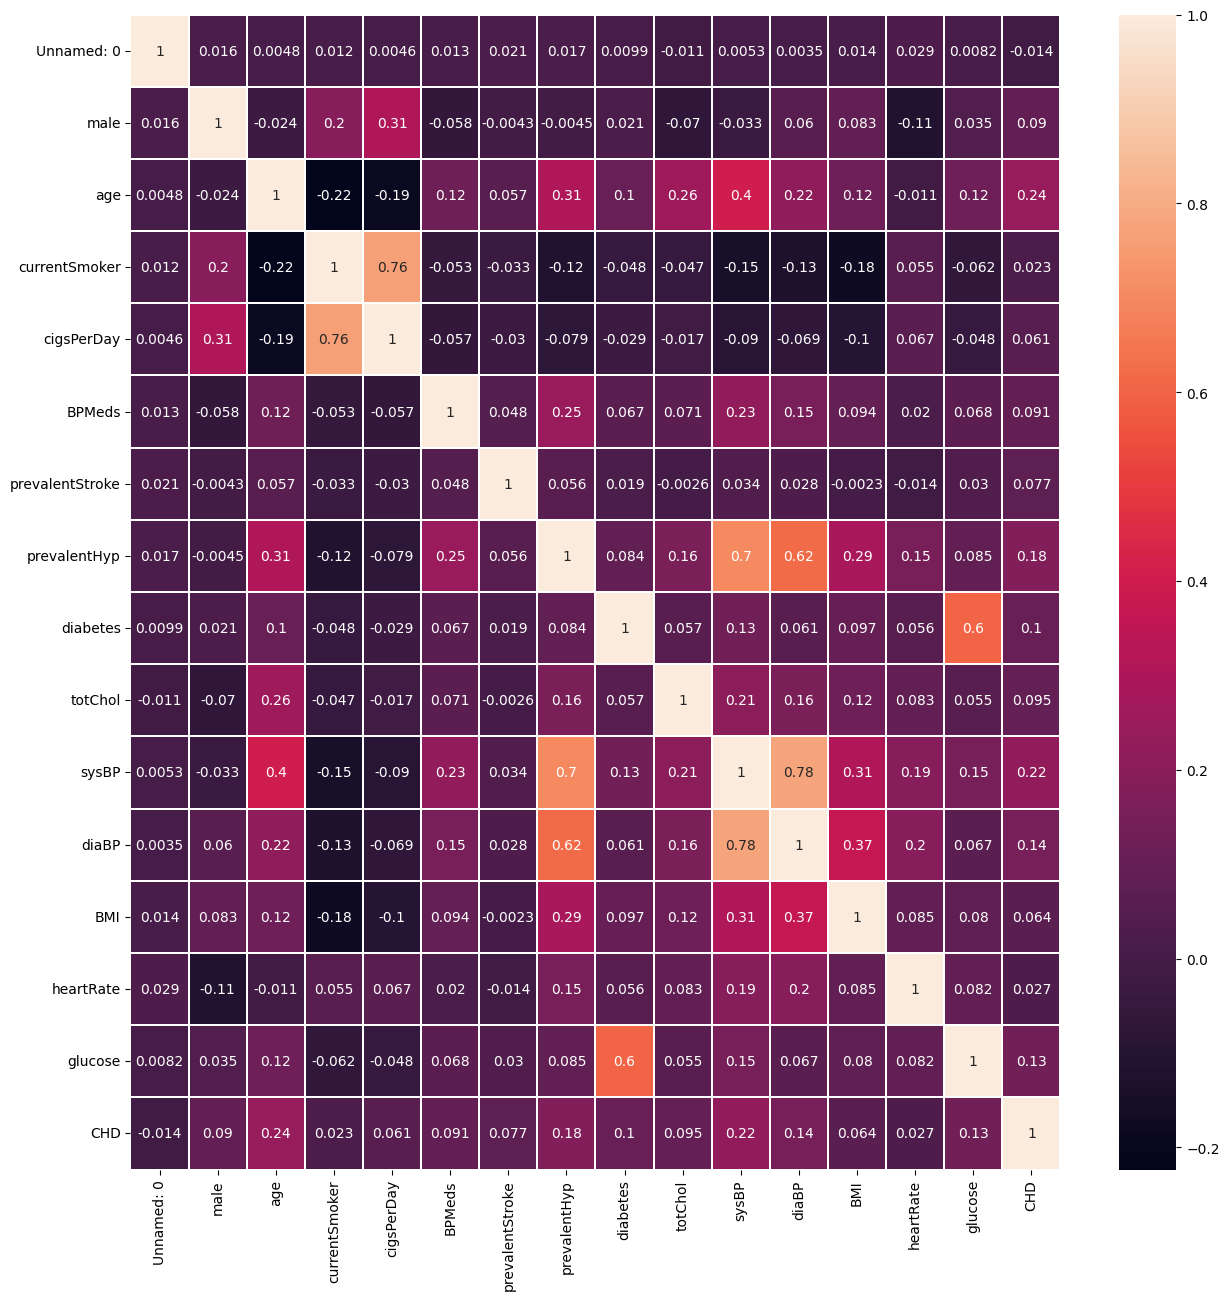

In [357]:
plt.figure(figsize=(15,15))#plotting a figure of size 15 and 15
sns.heatmap(train_data.corr(), annot=True, linewidths=0.1) #plotting a heatmat of dataframe correlation

In [358]:
train_data.drop(['currentSmoker', 'diaBP'], axis=1, inplace=True)#dropping the column becuase they are correlated very high

In [359]:
# Deleting Outliers
train_data = train_data[~(train_data['sysBP'] > 220)] 
train_data = train_data[~(train_data['BMI'] > 43)]
train_data = train_data[~(train_data['heartRate'] > 125)]
train_data = train_data[~(train_data['glucose'] > 200)]
train_data = train_data[~(train_data['totChol'] > 450)]
train_data

,Unnamed: 0,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
2859,734,1.0,44.0,30.0,0.0,0.0,0.0,0.0,334.0,131.0,28.82,80.0,77.0,1.0
283,3120,0.0,48.0,9.0,0.0,0.0,0.0,0.0,248.0,114.5,27.69,95.0,75.0,0.0
2442,3876,0.0,59.0,0.0,0.0,0.0,1.0,0.0,244.0,160.0,29.41,72.0,85.0,0.0
1055,3401,1.0,58.0,9.0,0.0,0.0,0.0,0.0,229.0,140.0,25.96,80.0,83.0,0.0
3570,1634,1.0,36.0,20.0,0.0,0.0,0.0,0.0,204.0,132.5,21.27,70.0,84.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,2237,0.0,48.0,0.0,0.0,0.0,1.0,0.0,246.0,165.0,27.60,122.0,73.0,0.0
1014,3045,1.0,39.0,15.0,0.0,0.0,0.0,0.0,208.0,135.0,20.71,70.0,75.0,0.0
2642,3115,1.0,44.0,0.0,0.0,0.0,0.0,0.0,238.0,132.0,27.22,75.0,85.0,0.0
2024,2929,1.0,46.0,15.0,0.0,0.0,1.0,0.0,212.0,132.0,22.08,63.0,75.0,0.0


In [360]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
# List of columns to standardize
cols_to_standardise = ['age', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']

# Apply StandardScaler to specified columns
train_data[cols_to_standardise] = scaler.fit_transform(train_data[cols_to_standardise])
train_data

,Unnamed: 0,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
2859,734,1.0,-0.647580,1.803014,0.0,0.0,0.0,0.0,2.274319,-0.037853,0.785752,0.357473,-0.200985,1.0
283,3120,0.0,-0.180409,0.012368,0.0,0.0,0.0,0.0,0.279359,-0.810351,0.499568,1.606139,-0.345878,0.0
2442,3876,0.0,1.104310,-0.755052,0.0,0.0,1.0,0.0,0.186570,1.319870,0.935175,-0.308482,0.378586,0.0
1055,3401,1.0,0.987517,0.012368,0.0,0.0,0.0,0.0,-0.161388,0.383509,0.061429,0.357473,0.233693,0.0
3570,1634,1.0,-1.581921,0.950325,0.0,0.0,0.0,0.0,-0.741318,0.032374,-1.126360,-0.474971,0.306140,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,2237,0.0,-0.180409,-0.755052,0.0,0.0,1.0,0.0,0.232965,1.553960,0.476775,3.853738,-0.490771,0.0
1014,3045,1.0,-1.231543,0.523981,0.0,0.0,0.0,0.0,-0.648529,0.149419,-1.268185,-0.474971,-0.345878,0.0
2642,3115,1.0,-0.647580,-0.755052,0.0,0.0,0.0,0.0,0.047387,0.008965,0.380536,-0.058749,0.378586,0.0
2024,2929,1.0,-0.413994,0.523981,0.0,0.0,1.0,0.0,-0.555741,0.008965,-0.921219,-1.057682,-0.345878,0.0


In [361]:
from sklearn.impute import SimpleImputer
test_data.drop(['currentSmoker', 'diaBP'], axis=1, inplace=True)

imputer = SimpleImputer(strategy='most_frequent')#Creating an instance of simple Imputer which will be used to fill the null vlaues
test_data = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)


In [362]:
test_data

,Unnamed: 0,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
0,1868.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,344.0,119.0,26.82,80.0,105.0,0.0
1,2613.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,211.0,129.0,29.09,62.0,117.0,0.0
2,3815.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,266.0,115.5,23.68,82.0,83.0,1.0
3,645.0,0.0,39.0,3.0,0.0,0.0,0.0,0.0,273.0,116.0,28.73,75.0,75.0,0.0
4,1189.0,0.0,48.0,0.0,0.0,0.0,1.0,0.0,169.0,243.0,28.49,85.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1679.0,0.0,34.0,20.0,0.0,0.0,0.0,0.0,175.0,117.5,22.15,65.0,75.0,0.0
726,3088.0,0.0,58.0,0.0,1.0,1.0,1.0,0.0,274.0,159.0,28.40,72.0,81.0,0.0
727,4127.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,287.0,155.0,28.54,75.0,75.0,0.0
728,1662.0,0.0,54.0,5.0,0.0,0.0,1.0,0.0,209.0,139.0,25.82,72.0,95.0,0.0


In [363]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
# List of columns to standardize
cols_to_standardise = ['age', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']
test_data[cols_to_standardise] = scaler.fit_transform(test_data[cols_to_standardise])
test_data

,Unnamed: 0,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
0,1868.0,0.0,0.765407,-0.762372,0.0,0.0,0.0,0.0,2.466935,-0.627442,0.214346,0.323024,1.190858,0.0
1,2613.0,0.0,0.302868,-0.762372,0.0,0.0,0.0,0.0,-0.628130,-0.169089,0.769803,-1.204888,1.773744,0.0
2,3815.0,1.0,1.227946,-0.762372,0.0,0.0,0.0,0.0,0.651784,-0.787866,-0.553995,0.492792,0.122233,1.0
3,645.0,0.0,-1.200384,-0.515317,0.0,0.0,0.0,0.0,0.814682,-0.764948,0.681713,-0.101396,-0.266358,0.0
4,1189.0,0.0,-0.159671,-0.762372,0.0,0.0,1.0,0.0,-1.605519,5.056142,0.622986,0.747444,-0.169210,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1679.0,0.0,-1.778558,0.884658,0.0,0.0,0.0,0.0,-1.465892,-0.696195,-0.928378,-0.950236,-0.266358,0.0
726,3088.0,0.0,0.996677,-0.762372,1.0,1.0,1.0,0.0,0.837953,1.205972,0.600963,-0.356048,0.025085,0.0
727,4127.0,0.0,-0.159671,-0.762372,0.0,0.0,0.0,0.0,1.140478,1.022631,0.635221,-0.101396,-0.266358,0.0
728,1662.0,0.0,0.534138,-0.350614,0.0,0.0,1.0,0.0,-0.674672,0.289265,-0.030349,-0.356048,0.705119,0.0


In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
tree = LogisticRegression(solver='saga', max_iter=10000, random_state=42)
clf = tree.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
accuracy_score(y_test,y_pred)

0.8465753424657534

In [365]:
from sklearn.tree import DecisionTreeClassifier  
tree = DecisionTreeClassifier(max_depth=3) 
clf = tree.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
accuracy_score(y_pred,y_test)

0.8397260273972603

In [366]:
from sklearn.ensemble import RandomForestClassifier 
neigh = RandomForestClassifier(n_estimators=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8